# Running a marathon is like running a small business

###### A lot of profit can come from running a marathon. For example, the 2019 London Marathon raised about 1.3 billion dollars. In order to retain its current audience and potentially attract more participants, we need information on what kind of audience past marathons attract. Using this Hong Kong Marathon dataset from Kaggle, we can get insight on whether or not marathons attract a diverse audience.

In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets, metrics

# Import Dataset

In [4]:
df_1 = pd.read_csv('run1.csv')
df_1.head()
#it looks like theyre the same information, but just that the dataset above is ordered by time
#so then i dont think it matters much which one I use

,Overall Position,Gender Position,Category Position,Category,Race No,Country,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,1,1,1,MR1,A0066,Ireland,2:51:05,2:51:02,0:38:50,1:23:15,1:59:44
1,2,2,2,MR1,A6190,Hong Kong SAR,2:54:04,2:53:57,0:39:35,1:24:09,2:00:24
2,3,3,3,MR1,A4491,China,2:58:34,2:57:28,0:40:53,1:27:03,2:04:02
3,4,4,4,MR1,A8955,China,3:03:34,3:03:28,0:42:52,1:30:34,2:08:36
4,5,5,5,MR1,A5879,China,3:04:50,3:04:49,0:40:42,1:27:31,2:06:08


In [181]:
df_1.describe()

,Overall Position,Gender Position,Category Position
count,7233.000000,7233.000000,7233.000000
mean,3617.011060,2648.486244,3617.011060
std,2088.150702,1849.912839,2088.150702
min,1.000000,1.000000,1.000000
25%,1809.000000,905.000000,1809.000000
50%,3617.000000,2465.000000,3617.000000
75%,5425.000000,4273.000000,5425.000000
max,7238.000000,6084.000000,7238.000000


In [86]:
# i want to check how the columns are formatted
df_1.columns

Index(['Overall Position', 'Gender Position', 'Category Position', 'Category',
       'Race No', 'Country ', 'Official Time', 'Net Time', '10km Time',
       'Half Way Time', '30km Time'],
      dtype='object')

In [87]:
# i want to get some info about the columns
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7233 entries, 0 to 7232
Data columns (total 11 columns):
Overall Position     7233 non-null int64
Gender Position      7233 non-null int64
Category Position    7233 non-null int64
Category             7233 non-null object
Race No              7233 non-null object
Country              7233 non-null object
Official Time        7233 non-null object
Net Time             7233 non-null object
10km Time            7200 non-null object
Half Way Time        7211 non-null object
30km Time            7207 non-null object
dtypes: int64(3), object(8)
memory usage: 621.7+ KB


# Data Cleaning

In [5]:
#first i will delete the columns that I don't think will give meaningful information
#'Overall Position', 'Gender Position', 'Category Position', 'Category',
       #'Race No', 'Country ',

del df_1['Overall Position']
del df_1['Gender Position']
del df_1['Category Position']
del df_1['Category']
del df_1['Race No']
del df_1['Country ']

df_1.head()

,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,2:51:05,2:51:02,0:38:50,1:23:15,1:59:44
1,2:54:04,2:53:57,0:39:35,1:24:09,2:00:24
2,2:58:34,2:57:28,0:40:53,1:27:03,2:04:02
3,3:03:34,3:03:28,0:42:52,1:30:34,2:08:36
4,3:04:50,3:04:49,0:40:42,1:27:31,2:06:08


In [183]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7233 entries, 0 to 7232
Data columns (total 5 columns):
Official Time    7233 non-null object
Net Time         7233 non-null object
10km Time        7200 non-null object
Half Way Time    7211 non-null object
30km Time        7207 non-null object
dtypes: object(5)
memory usage: 282.6+ KB


In [6]:
#10km Time, Half Way Time, and #30km Time all have Nan
#so I'll try to .fillna() to the mean

df_1['10km Time'].fillna('-', inplace = True)
df_1['Half Way Time'].fillna('-', inplace = True)
df_1['30km Time'].fillna('-', inplace = True)

In [163]:
df_1

,Official Time,Net Time,10km Time,Half Way Time,30km Time
0,2:51:05,2:51:02,0:38:50,1:23:15,1:59:44
1,2:54:04,2:53:57,0:39:35,1:24:09,2:00:24
2,2:58:34,2:57:28,0:40:53,1:27:03,2:04:02
3,3:03:34,3:03:28,0:42:52,1:30:34,2:08:36
4,3:04:50,3:04:49,0:40:42,1:27:31,2:06:08
5,3:09:24,3:09:23,0:45:05,1:34:01,-
6,3:09:28,3:08:52,0:43:24,1:31:39,2:10:46
7,3:10:46,3:09:42,0:47:08,1:36:10,2:15:34
8,3:12:06,3:10:26,0:48:21,1:36:52,2:16:24
9,3:13:22,3:13:19,0:42:49,1:31:16,2:11:51


In [186]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7233 entries, 0 to 7232
Data columns (total 5 columns):
Official Time    7233 non-null object
Net Time         7233 non-null object
10km Time        7233 non-null object
Half Way Time    7233 non-null object
30km Time        7233 non-null object
dtypes: object(5)
memory usage: 282.6+ KB


In [7]:
#df_1.head()
#for official_times in df_1['Official Time (in minutes)']:
    #t = official_times
def time_to_dec(time): # though this function does not work for Nan
    if time == '-':
        time = 0
        return time
    #if time == 'Nan':
        #time = 0
    else:
        (h, m, s) = time.split(':')
        result = int(h) * 60 + int(m) + int(s)/60
        return result

df_1['Official Time (in minutes)'] = df_1['Official Time'].apply(time_to_dec)
df_1['Net Time (in minutes)'] = df_1['Net Time'].apply(time_to_dec)  
df_1['10km Time (in minutes)'] = df_1['10km Time'].apply(time_to_dec)  
df_1['Half Way Time (in minutes)'] = df_1['Half Way Time'].apply(time_to_dec)  
df_1['30km Time (in minutes)'] = df_1['30km Time'].apply(time_to_dec)  
df_1

,Official Time,Net Time,10km Time,Half Way Time,30km Time,Official Time (in minutes),Net Time (in minutes),10km Time (in minutes),Half Way Time (in minutes),30km Time (in minutes)
0,2:51:05,2:51:02,0:38:50,1:23:15,1:59:44,171.083333,171.033333,38.833333,83.250000,119.733333
1,2:54:04,2:53:57,0:39:35,1:24:09,2:00:24,174.066667,173.950000,39.583333,84.150000,120.400000
2,2:58:34,2:57:28,0:40:53,1:27:03,2:04:02,178.566667,177.466667,40.883333,87.050000,124.033333
3,3:03:34,3:03:28,0:42:52,1:30:34,2:08:36,183.566667,183.466667,42.866667,90.566667,128.600000
4,3:04:50,3:04:49,0:40:42,1:27:31,2:06:08,184.833333,184.816667,40.700000,87.516667,126.133333
5,3:09:24,3:09:23,0:45:05,1:34:01,-,189.400000,189.383333,45.083333,94.016667,0.000000
6,3:09:28,3:08:52,0:43:24,1:31:39,2:10:46,189.466667,188.866667,43.400000,91.650000,130.766667
7,3:10:46,3:09:42,0:47:08,1:36:10,2:15:34,190.766667,189.700000,47.133333,96.166667,135.566667
8,3:12:06,3:10:26,0:48:21,1:36:52,2:16:24,192.100000,190.433333,48.350000,96.866667,136.400000
9,3:13:22,3:13:19,0:42:49,1:31:16,2:11:51,193.366667,193.316667,42.816667,91.266667,131.850000


In [9]:
# so then now since I converted the times to minutes, I'm going to delete the original columns
del df_1['Official Time']
del df_1['Net Time']
del df_1['10km Time']
del df_1['Half Way Time']
del df_1['30km Time']

In [16]:
df_1.describe()

,Official Time (in minutes),Net Time (in minutes),10km Time (in minutes),Half Way Time (in minutes),30km Time (in minutes)
count,7233.000000,7233.000000,7233.000000,7233.000000,7233.000000
mean,300.735105,297.798781,69.093440,141.643297,204.595318
std,37.595376,37.080805,9.868052,18.578441,28.165373
min,171.083333,171.033333,0.000000,0.000000,0.000000
25%,273.350000,270.550000,63.650000,129.750000,186.900000
50%,302.800000,299.733333,70.100000,143.183333,206.766667
75%,331.783333,328.366667,75.766667,154.900000,224.666667
max,362.850000,359.766667,95.283333,188.383333,266.016667


In [17]:
df_1.head(20)

,Official Time (in minutes),Net Time (in minutes),10km Time (in minutes),Half Way Time (in minutes),30km Time (in minutes)
0,171.083333,171.033333,38.833333,83.250000,119.733333
1,174.066667,173.950000,39.583333,84.150000,120.400000
2,178.566667,177.466667,40.883333,87.050000,124.033333
3,183.566667,183.466667,42.866667,90.566667,128.600000
4,184.833333,184.816667,40.700000,87.516667,126.133333
5,189.400000,189.383333,45.083333,94.016667,0.000000
6,189.466667,188.866667,43.400000,91.650000,130.766667
7,190.766667,189.700000,47.133333,96.166667,135.566667
8,192.100000,190.433333,48.350000,96.866667,136.400000
9,193.366667,193.316667,42.816667,91.266667,131.850000


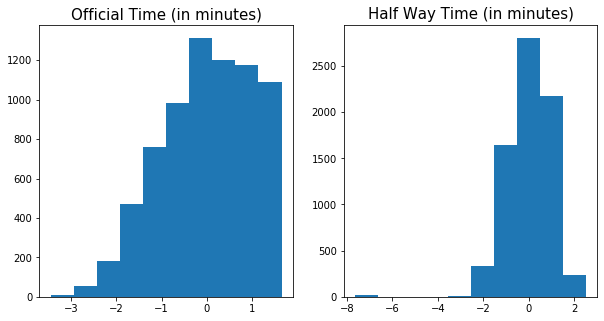

In [30]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import scale

fig_hist, axs_hist = plt.subplots(1, 2, figsize=(10, 5))
#Official Time
axs_hist[0].hist(scale(winsorize(df_1['Official Time (in minutes)'])))
axs_hist[0].set_title('Official Time (in minutes)', fontsize =15)
#Half Way
axs_hist[1].hist(scale(winsorize(df_1['Half Way Time (in minutes)'])))
axs_hist[1].set_title('Half Way Time (in minutes)', fontsize =15)


plt.show()

# Exploring my Data

###### Since the data is running data, the trend for each variable in this set will be overall consistent. So then, looking at the histograms of these selected plots, it looks like the data is left-skewed. This means that only some people ran faster than the average time of most people who ran the marathon. For this project, I will take advantage of the variables: Official time, Net time, 10km time, Halfway time, and 30km time as the variables since other variables may not give meaningful information. These selected variables will give information on what kinds of runners there (professional, recreational, etc.) are depending on their running times.

In [31]:
columnnames= list(df_1.columns) #attaching column names in list form to a variable

from sklearn.preprocessing import StandardScaler

# Separating out the features
X = df_1[columnnames]

# Standardizing the features
X_std = StandardScaler().fit_transform(X)

In [11]:
df_1.shape

(7233, 5)

# My Modeling Pipeline

###### After data cleaning, I will use dimensionality reduction techniques (PCA, t-SNE, UMAP) and see which option produces the clearest clusters. And then depending on this result, I will run it on several clustering algorithims (GMM, K-means, DBSCAN, Hierarchical Clustering) and see which combination yields the best silhouette score. And then depending on which model gives the best silhouette score, this will be the model I will use to depict the given dataset.

# Dimensionality Reduction Techniques

## PCA Dimensionality Reduction

In [12]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

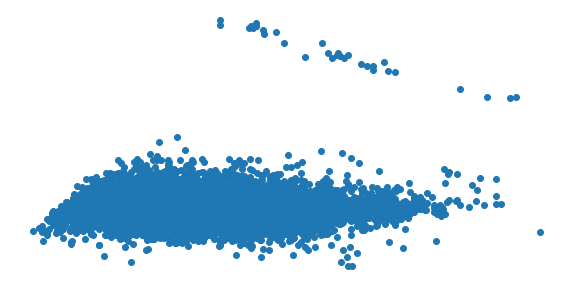

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## t-SNE Dimensionality Reduction

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000) 
# since we want to visualize tsne in 2 dimensions, n_components = 2
tsne_results = tsne.fit_transform(X_std)

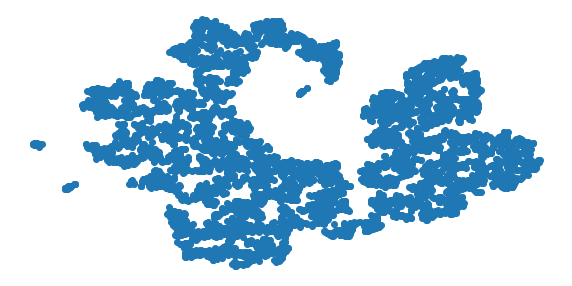

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## UMAP Dimensionality Reduction

In [17]:
import umap
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X_std)

//anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/lib/python3.7/site-pac

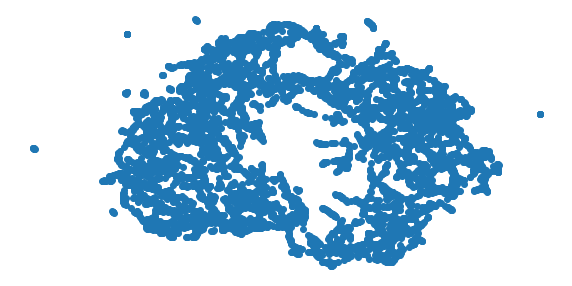

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## Dimensionality Reduction Plots

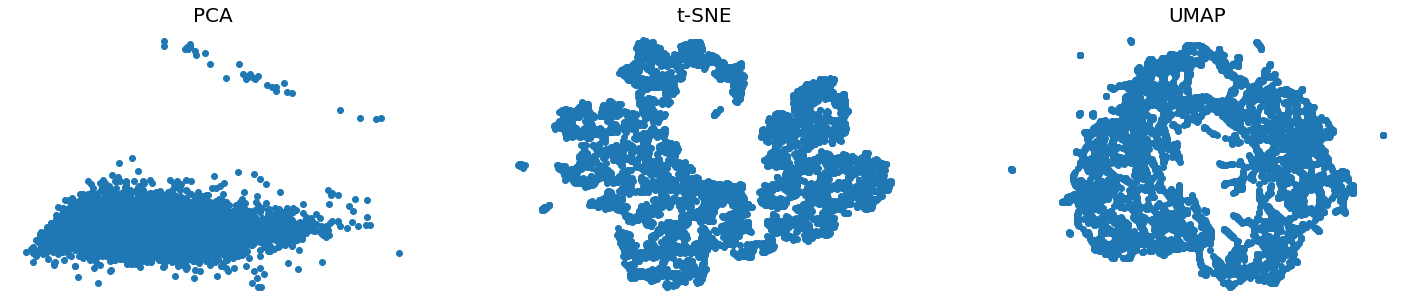

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

#PCA plot
axs[0].scatter(pca_components[:, 0], pca_components[:, 1])
axs[0].axis('off')
axs[0].set_title('PCA', fontsize =20)
#t-SNE plot
axs[1].scatter(tsne_results[:, 0], tsne_results[:, 1])
axs[1].axis('off')
axs[1].set_title('t-SNE', fontsize =20)
#UMAP
axs[2].scatter(umap_results[:, 0], umap_results[:, 1])
axs[2].axis('off')
axs[2].set_title('UMAP', fontsize =20)


plt.show()

# Chosen Dimensionality Reduction Technique

###### For the dimensionality reduction techniques, I will run the clustering algorithms using PCA and t-SNE and see which combinations yield the best silhouette scores

# Clustering Algorithms: GMM, Hierarchical, DBSCAN, K-means

## K-means with PCA (n_clusters = 2)

In [51]:
# Defining the k-means
kmeans_cluster_pca = KMeans(n_clusters=2, random_state=123)

# Fit model
cluster_kmeans_pca = kmeans_cluster_pca.fit(pca_components)
y_pred_pca = kmeans_cluster_pca.predict(pca_components)

#Find the silhouette score
print("The silhouette score of the K-means solution with 2 clusters: {}"
      .format(metrics.silhouette_score(pca_components, y_pred_pca, metric='euclidean')))

The silhouette score of the K-means solution with 2 clusters: 0.5215893450598819


In [ ]:
#Plot
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y_pred_pca[i]), 
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## K-means with PCA (n_clusters =3)

In [52]:
# Defining the k-means
kmeans_cluster_pca3 = KMeans(n_clusters=3, random_state=123)

# Fit model
cluster_kmeans_pca3 = kmeans_cluster_pca3.fit(pca_components)
y_pred_pca3 = kmeans_cluster_pca3.predict(pca_components)

#Find the silhouette score
print("The silhouette score of the K-means solution with 3 clusters: {}"
      .format(metrics.silhouette_score(pca_components, y_pred_pca3, metric='euclidean')))

The silhouette score of the K-means solution with 3 clusters: 0.457633951474363


## GMM with PCA

In [133]:
# Defining the agglomerative clustering
gmm_cluster_pca = GaussianMixture(n_components=2) #, random_state=123)

# Fit model
clusters_gmm_pca = gmm_cluster_pca.fit_predict(pca_components)

#Find the silhouette score
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(pca_components, clusters_gmm_pca, metric='euclidean')))

The silhouette score of the GMM solution: 0.5733494650756058


## Hierarchical Clustering with PCA (n_clusters = 2)

In [57]:
# Defining the agglomerative clustering
agg_cluster_pca = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=2)

# Fit model
clusters_agg_pca = agg_cluster_pca.fit_predict(pca_components)

#Find the silhouette score
print("The silhouette score of the Hierarchical Clustering solution: {}"
      .format(metrics.silhouette_score(pca_components, clusters_agg_pca, metric='euclidean')))

The silhouette score of the Hierarchical Clustering solution: 0.513347380537448


## Hierarchical Clustering with PCA (n_clusters = 3)

In [58]:
# Defining the agglomerative clustering
agg_cluster_pca3 = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=3)

# Fit model
clusters_agg_pca3 = agg_cluster_pca3.fit_predict(pca_components)

#Find the silhouette score
print("The silhouette score of the Hierarchical Clustering solution: {}"
      .format(metrics.silhouette_score(pca_components, clusters_agg_pca3, metric='euclidean')))

The silhouette score of the Hierarchical Clustering solution: 0.245294328512312


## DBSCAN with PCA

In [14]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters_pca = dbscan_cluster.fit_predict(pca_components)

#Get the silhouette score
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(pca_components, clusters_pca, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.6138229889238278


# K-means with t-SNE

In [39]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=123)

# Fit model
cluster_kmeans = kmeans_cluster.fit(tsne_results)
y_pred = kmeans_cluster.predict(tsne_results)

#Find the silhouette score
print("The silhouette score of the K-means solution: {}"
      .format(metrics.silhouette_score(tsne_results, y_pred, metric='euclidean')))

The silhouette score of the K-means solution: 0.47823619842529297


# K-means with t-SNE (n_clusters = 3)

In [40]:
# Defining the k-means
kmeans_cluster_3 = KMeans(n_clusters=3, random_state=123)

# Fit model
cluster_kmeans_3 = kmeans_cluster_3.fit(tsne_results)
y_pred_3 = kmeans_cluster_3.predict(tsne_results)

#Find the silhouette score
print("The silhouette score of the K-means solution: {}"
      .format(metrics.silhouette_score(tsne_results, y_pred_3, metric='euclidean')))

The silhouette score of the K-means solution: 0.39544248580932617


# GMM with t-SNE

In [54]:
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn import datasets, metrics

In [31]:
# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=2) #, random_state=123)

# Fit model
clusters_gmm = gmm_cluster.fit_predict(tsne_results)

In [32]:
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters_gmm, metric='euclidean')))

The silhouette score of the GMM solution: 0.4718489348888397


# Hierarchical Clustering with t-SNE

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [35]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=2)

# Fit model
clusters_agg = agg_cluster.fit_predict(tsne_results)

In [36]:
print("The silhouette score of the Hierarchical Clustering solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters_agg, metric='euclidean')))

The silhouette score of the Hierarchical Clustering solution: 0.3711036443710327


# Hierarchical Clustering with t-SNE (n_clusters = 3)

In [38]:
# Defining the agglomerative clustering
agg_cluster_3 = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=3)

# Fit model
clusters_agg_3 = agg_cluster_3.fit_predict(tsne_results)

print("The silhouette score of the Hierarchical Clustering solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters_agg_3, metric='euclidean')))

The silhouette score of the Hierarchical Clustering solution: 0.34701189398765564


# DBSCAN with t-SNE

In [2]:
from sklearn.cluster import DBSCAN

In [43]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(tsne_results)

#Get the silhouette score
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(tsne_results, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.04538537189364433


## K-means with UMAP (n_clusters = 2)

In [49]:
# Defining the k-means
kmeans_cluster_umap = KMeans(n_clusters=2, random_state=123)

# Fit model
cluster_kmeans_umap = kmeans_cluster_umap.fit(umap_results)
y_pred_umap = kmeans_cluster_umap.predict(umap_results)

#Find the silhouette score
print("The silhouette score of the K-means solution with 2 clusters: {}"
      .format(metrics.silhouette_score(umap_results, y_pred_umap, metric='euclidean')))

The silhouette score of the K-means solution with 2 clusters: 0.4267376959323883


## K-means with UMAP (n_clusters = 3)

In [50]:
# Defining the k-means
kmeans_cluster_umap3 = KMeans(n_clusters=3, random_state=123)

# Fit model
cluster_kmeans_umap3 = kmeans_cluster_umap3.fit(umap_results)
y_pred_umap3 = kmeans_cluster_umap3.predict(umap_results)

#Find the silhouette score
print("The silhouette score of the K-means solution with 3 clusters: {}"
      .format(metrics.silhouette_score(umap_results, y_pred_umap3, metric='euclidean')))

The silhouette score of the K-means solution with 3 clusters: 0.42898181080818176


## GMM with UMAP

In [55]:
# Defining the agglomerative clustering
gmm_cluster_umap = GaussianMixture(n_components=2) #, random_state=123)

# Fit model
clusters_gmm_umap = gmm_cluster_umap.fit_predict(umap_results)

#Find the silhouette score
print("The silhouette score of the GMM solution: {}"
      .format(metrics.silhouette_score(umap_results, clusters_gmm_umap, metric='euclidean')))

The silhouette score of the GMM solution: 0.42595988512039185


## Hierarchical Clustering with UMAP (n_clusters = 2)

In [58]:
# Defining the agglomerative clustering
agg_cluster_umap = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=2)

# Fit model
clusters_agg_umap = agg_cluster_umap.fit_predict(umap_results)

#Get silhouette score
print("The silhouette score of the Hierarchical Clustering solution with 2 clusters: {}"
      .format(metrics.silhouette_score(umap_results, clusters_agg_umap, metric='euclidean')))

The silhouette score of the Hierarchical Clustering solution with 2 clusters: 0.13182112574577332


## Hierarchical Clustering with UMAP (n_clusters = 3 )

In [60]:
# Defining the agglomerative clustering
agg_cluster_umap3 = AgglomerativeClustering(linkage='complete', 
                                      affinity='cosine',
                                             n_clusters=3)

# Fit model
clusters_agg_umap3 = agg_cluster_umap3.fit_predict(umap_results)

#Get silhouette score
print("The silhouette score of the Hierarchical Clustering solution with 3 clusters: {}"
      .format(metrics.silhouette_score(umap_results, clusters_agg_umap3, metric='euclidean')))

The silhouette score of the Hierarchical Clustering solution with 3 clusters: 0.21244879066944122


## DBSCAN with UMAP

In [65]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters_umap = dbscan_cluster.fit_predict(umap_results)

#Get the silhouette score
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(umap_results, clusters_umap, metric='euclidean')))

The silhouette score of the DBSCAN solution: -0.302215039730072


# Evaluating your Model with Silhouette Score

###### Comparing the silhouette scores of different combinations of dimensionality reducion techniques and clustering algorithms,  we see that DBSCAN with PCA yield the best score of 0.61. Thus, this is our best performing model that shows clusters in our dataset.

In [72]:
# initialize list of lists 
summary_data = [[0.52, 0.48, 0.43],
               [0.45, 0.40, 0.43],
               [0.58, 0.47, 0.43],
               [0.51, 0.37, 0.13],
               [0.24, 0.35, 0.21],
                [0.61, 0.04, -0.30]
               ] 
  
# Create the pandas DataFrame 
silhouettescore_df = pd.DataFrame(summary_data, columns = ['PCA','t-SNE','UMAP'],
                                 index = ['K-means (n_clusters=2)','K-means (n_clusters=3)','GMM',
                                  'Hierarchical Clustering (n_clusters=2)','Hierarchical Clustering (n_clusters=3)'
                                  ,'DBSCAN']) 
  
# print dataframe. 
silhouettescore_df 

,PCA,t-SNE,UMAP
K-means (n_clusters=2),0.52,0.48,0.43
K-means (n_clusters=3),0.45,0.40,0.43
GMM,0.58,0.47,0.43
Hierarchical Clustering (n_clusters=2),0.51,0.37,0.13
Hierarchical Clustering (n_clusters=3),0.24,0.35,0.21
DBSCAN,0.61,0.04,-0.30


# Plot of the Best Performing Model

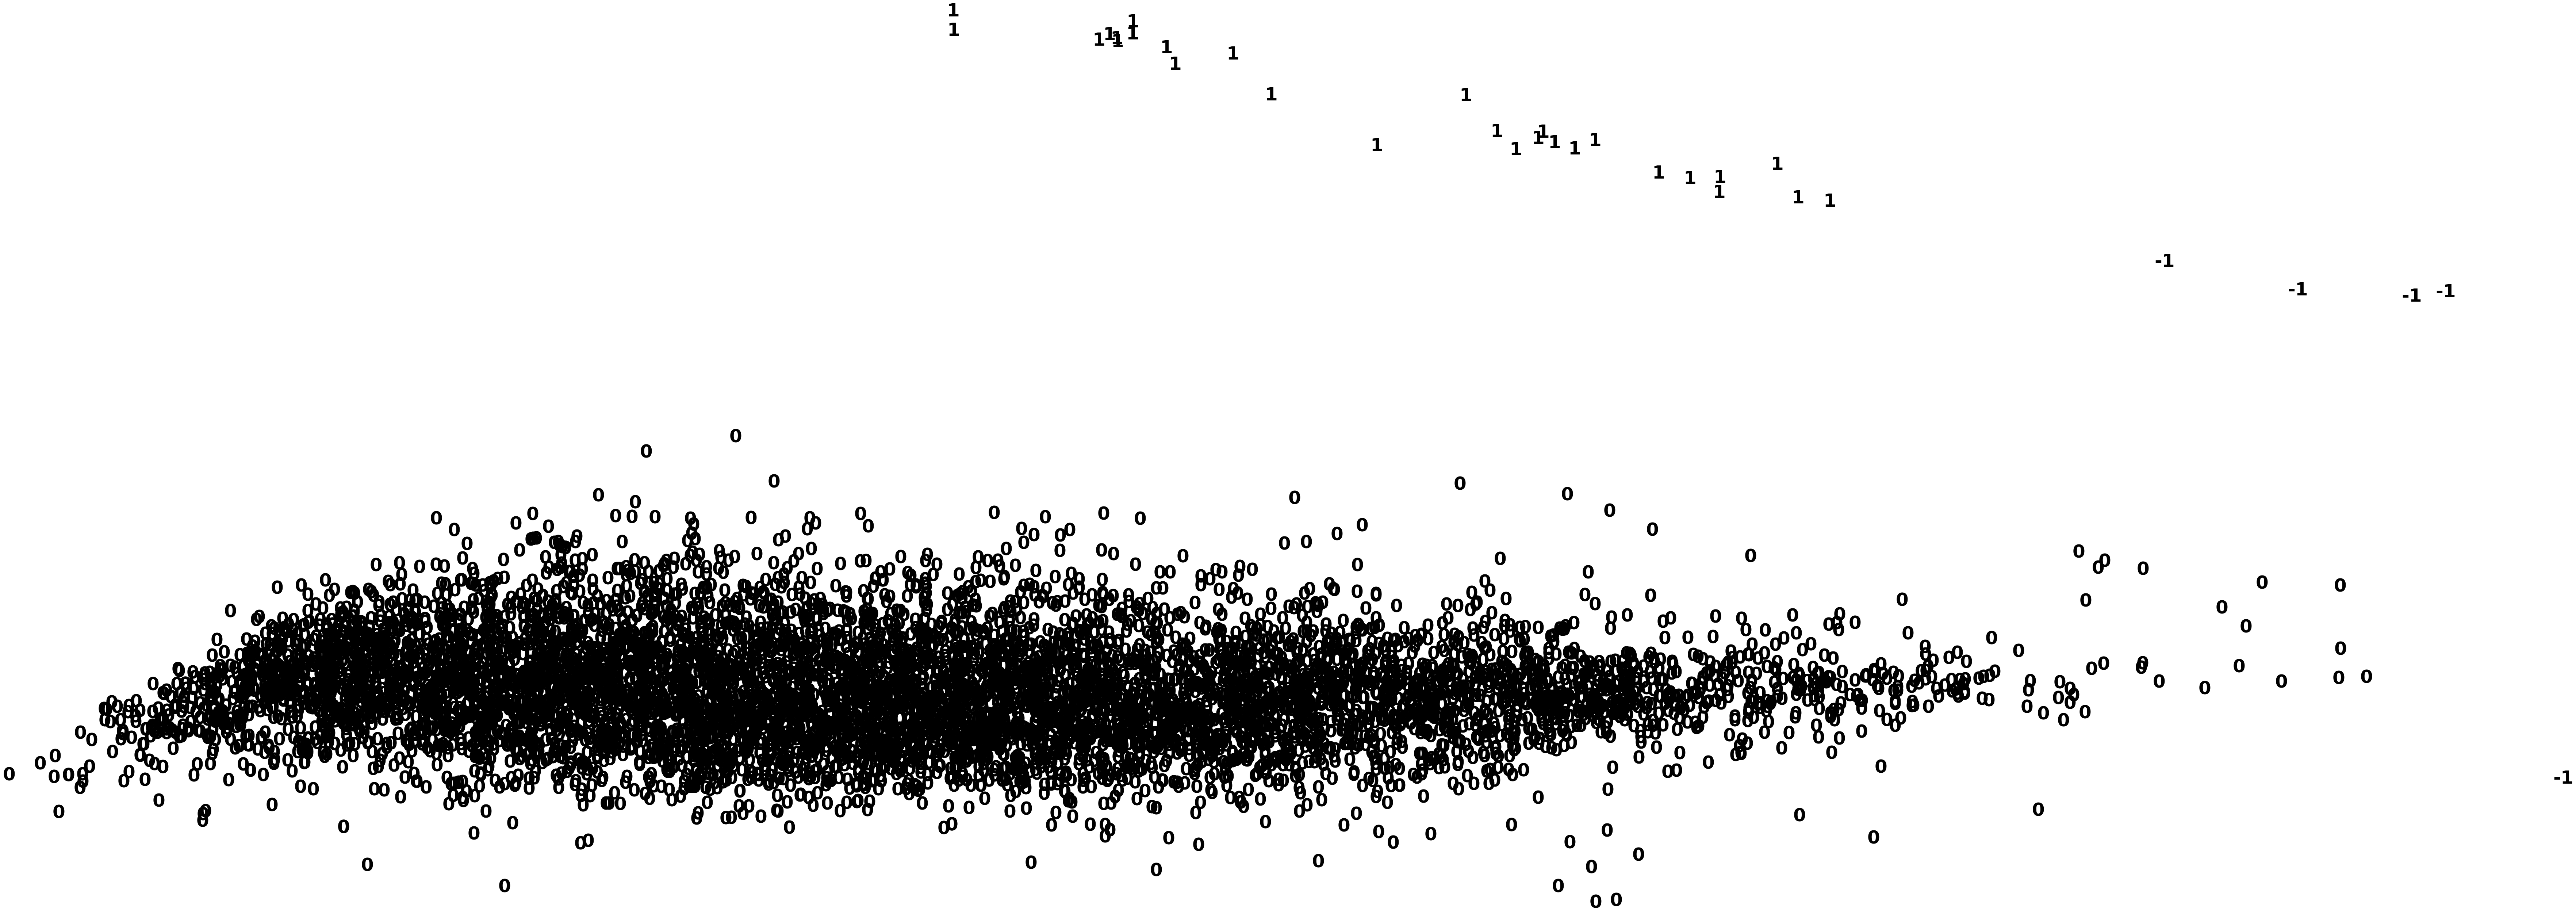

In [15]:
plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], str(clusters_pca[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

# Conclusion

###### Using this model, we can get insight on how many kinds of groups of people participate in a marathon. This is advantageous because the end-user can use this information to retain its current audience for future marathons or possibly consider options on how to create a larger appeal to reach a wider audience.


###### The next steps I would take to expand on my work is to play around with the parameters to see if (1) I can improve the silhouette scores even more. I would also (2) get insight on each cluster by getting summary statistics for each variable per cluster. I would also see if there are subgroupings in the giant cluster to see how we can more specifically cater to the audience.


###### To maintain this model in a production-like environment, I would make sure that all datapoints are collected per individual -- that there is no missing informatio. Finally if possible, I would get more information from the indivuals, instead of just running times. This would give better information on the runners and what their interests are.